### Systematic 2: Galactic Extinction

Information taken from the  Schlegel, Finkbeiner & Davis (1998) – or “SFD” dustmap

Taking the mean of the EBVS for every object in a pixel.

1. Get the EBV at the position of every object
2. Cluster Objects and associated EBVs into Healpy Pixels
3. Calculate Mean EBV per pixel
4. Project onto Healpy

In [2]:
from astropy.coordinates import SkyCoord, Latitude, Longitude
from dustmaps.sfd import SFDQuery
import pandas as pd
import healpy as hp
import numpy as np

In [3]:
df = pd.read_csv('../bricks_data/galaxy_catalogue_sample.csv')


NSIDE = 256
NPIX = hp.nside2npix(NSIDE)
print(
    "Approximate resolution at NSIDE {} is {:.2} deg".format(
        NSIDE, hp.nside2resol(NSIDE, arcmin=True) / 60
    )
)

Approximate resolution at NSIDE 256 is 0.23 deg


In [4]:
def raDec2thetaPhi(ra, dec):
    return (0.5 * np.pi - np.deg2rad(dec)), (np.deg2rad(ra))



In [5]:
ra = df["RA"].to_numpy(copy=True)
dec = df["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra, dec)

sfd = SFDQuery()
coords = SkyCoord(ra, dec, frame='icrs', unit='deg')
ebv = sfd(coords)


Mean EBV per Pixel: 0.04469618449456275


/Users/edgareggert/miniconda3/envs/astro/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Users/edgareggert/miniconda3/envs/astro/lib/python3.8/site-packages/healpy/projaxes.py:541: UserWarning: 0.0 180.0 -180.0 180.0
  warnings.warn(
/Users/edgareggert/miniconda3/envs/astro/lib/python3.8/site-packages/healpy/projaxes.py:656: UserWarning: The interval between parallels is 30 deg -0.00'.
  warnings.warn(
/Users/edgareggert/miniconda3/envs/astro/lib/python3.8/site-packages/healpy/projaxes.py:664: UserWarning: The interval between meridians is 30 deg -0.00'.
  warnings.warn(


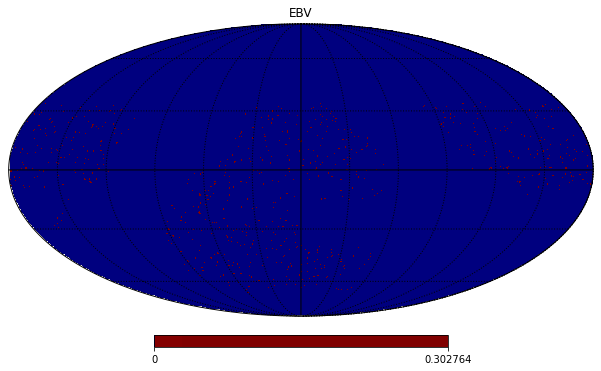

In [15]:
m = np.zeros(NPIX)
pixel_indices = hp.ang2pix(NSIDE, theta,phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
unique = np.unique(pixel_indices)

mean_extinction_per_pixel = np.zeros(len(unique))

# Calculating mean EBV for every pixel

for i,unique_pixel in enumerate(unique):
    indices_per_pixel_objects = (pixel_indices == unique_pixel)
    ebvs_per_pixel = ebv[indices_per_pixel_objects]
    sum_ebv = ebvs_per_pixel.sum()
    count_ebv = len(ebvs_per_pixel)
    mean_extinction_per_pixel[i] = sum_ebv/count_ebv

mean_ebv = mean_extinction_per_pixel.mean()
print("Mean EBV per Pixel:", mean_ebv)

m[unique] = mean_extinction_per_pixel
hp.mollview(m, title="EBV", norm="hist",cmap="jet")
hp.graticule()